<a href="https://colab.research.google.com/github/rixwan-khan/Providing-data-driven-suggestions-for-HR/blob/main/data-driven%20decision%20for%20HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone project: Providing Data-Driven Suggestions for HR**

## Description and deliverables

This capstone project analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, two artifacts that would be used for present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors.  The other is a complete code notebook provided here.

# **PACE stages**


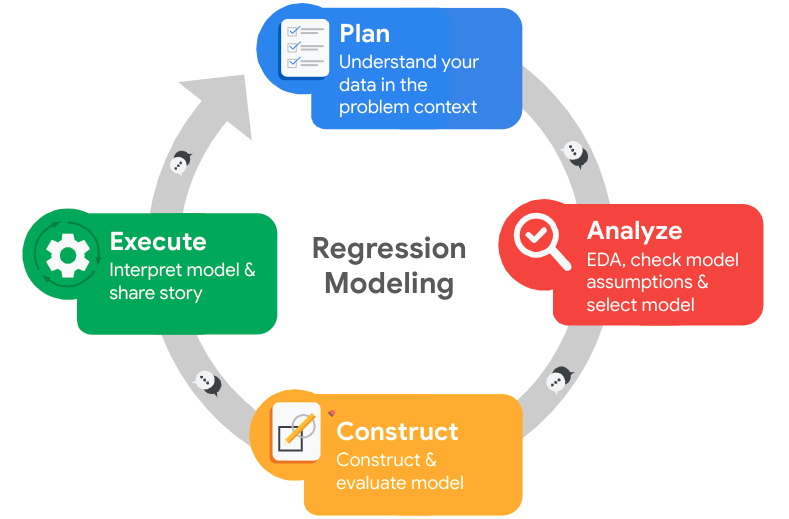

# **Pace: --> Plan**

### **Business scenario and problem**

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. For this reason providing data-driven suggestions based on understanding of the data. They have the following question: what’s likely to make the employee leave the company?

In this project goal is to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables:

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## **1. Imports**

*   Import packages
*   Load dataset



### **1.1 Importing Packages**


In [1]:
# Import packages

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### **1.2 Loading Dataset**


In [2]:
# Load dataset into a dataframe
data = 'https://raw.githubusercontent.com/rixwan-khan/Providing-data-driven-suggestions-for-HR/main/HR_comma_sep.csv'

df0 = pd.read_csv(data)

# Display first few rows of the dataframe
df0.sample(7)

satisfaction_level  last_evaluation  number_project  \
6395                 0.84             0.52               5   
6197                 0.15             0.39               5   
402                  0.74             1.00               5   
6000                 0.72             0.96               5   
8946                 0.50             0.67               3   
11616                0.62             0.40               3   
13929                0.63             0.85               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
6395                    189                   2              1     0   
6197                    229                   4              0     0   
402                     275                   5              0     1   
6000                    223                   3              1     0   
8946                    246                   3              0     0   
11616                   158                   8              1     0   
13929                   182                   3              1     0   

       promotion_last_5years Department salary  
6395                       0         IT    low  
6197                       0      sales    low  
402                        0      sales    low  
6000                       0    support    low  
8946                       0      sales    low  
11616                      0  marketing    low  
13929                      0      sales   high

## **2. Data Exploration (Initial EDA and data cleaning)**

- Understand datset variables
- Cleaning dataset (missing data, redundant data, outliers)

### **2.1 Gathering basic information about the data**

In [3]:
# Gather basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### **2.2 Descriptive Statistics about the data**

In [4]:
# Descriptive statistics about the data
df0.describe()

satisfaction_level  last_evaluation  number_project  \
count        14999.000000     14999.000000    14999.000000   
mean             0.612834         0.716102        3.803054   
std              0.248631         0.171169        1.232592   
min              0.090000         0.360000        2.000000   
25%              0.440000         0.560000        3.000000   
50%              0.640000         0.720000        4.000000   
75%              0.820000         0.870000        5.000000   
max              1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident          left  \
count          14999.000000        14999.000000   14999.000000  14999.000000   
mean             201.050337            3.498233       0.144610      0.238083   
std               49.943099            1.460136       0.351719      0.425924   
min               96.000000            2.000000       0.000000      0.000000   
25%              156.000000            3.000000       0.000000      0.000000   
50%              200.000000            3.000000       0.000000      0.000000   
75%              245.000000            4.000000       0.000000      0.000000   
max              310.000000           10.000000       1.000000      1.000000   

       promotion_last_5years  
count           14999.000000  
mean                0.021268  
std                 0.144281  
min                 0.000000  
25%                 0.000000  
50%                 0.000000  
75%                 0.000000  
max                 1.000000

- Satisfaction varies widely; some are extremely dissatisfied.
- Most employees perform well in evaluations.
- Workload distribution is uneven — some work extreme hours.
- Average tenure is 3.5 years, with a noticeable dropout rate (~24%).
- Very few promotions happen, which could be a driver for people leaving.

### **2.3 Renaming Columns**

Renameing the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled.

In [5]:
# Display all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
# Renaming columns
df0 = df0.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### **2.4 Checking missing values**

In [7]:
# Checking for missing values
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

### **2.5 Checking Duplicates**

In [8]:
# Checking for duplicates
dup = df0.duplicated().sum()
print('Duplicates:',dup)

Duplicates: 3008


3,008 rows contain duplicates. That is 20% of the data.

In [9]:
# Dropping duplicates and save resulting dataframe in a new variable

# drop_duplicates() removes duplicate rows from the DataFrame
# keep='first' → keeps the first occurrence and drops the rest
# keep='last'  → keeps the last occurrence and drops the earlier ones
# keep=False   → removes all duplicates (keeps none)
df1 = df0.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df1.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years department  salary  
0       3              0     1                      0      sales     low  
1       6              0     1                      0      sales  medium  
2       4              0     1                      0      sales  medium  
3       5              0     1                      0      sales     low  
4       3              0     1                      0      sales     low

### **2.6 Checking Outliers**

Outliers can only be checked in numeric columns, not in categorical or binary columns. In dataset we have following numeric columns:

*   `satisfaction_evel`
*   `last_evaluation`
*   `number_project`
*   `average_monthly_hours`
*   `tenure`



**Checking outliers using boxplot**

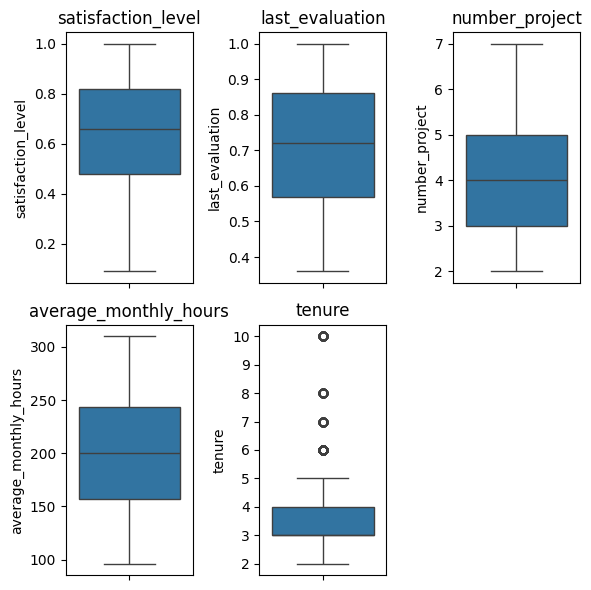

In [10]:
# Boxplot for outliers checking
numeric_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                'average_monthly_hours', 'tenure']


# Loop through numeric columns
# Using enumerate to get both index (i) and column name (col)
# The second parameter '1' means the index starts from 1 instead of 0
plt.figure(figsize=(6,6))
for i, col in enumerate(numeric_cols, 1):
  plt.subplot(2,3, i)
  sns.boxplot(y=df1[col])
  plt.title(col)
plt.tight_layout()
plt.show()

The `tenure` boxplot indicates a few outliers, with the majority of employees having tenures between 2 and 5 years, while only a small number fall in the 6 to 10 year range.

**Checking Outliers using IQR method**

In [11]:
# Determine the number of rows containing outliers

# 25th percentile value in `tenure`
percentile25 = df1['tenure'].quantile(0.25)

# 75th percentile value in `tenure`
percentile75 = df1['tenure'].quantile(0.75)

# interquartile range in `tenure`
iqr = percentile75 - percentile25

# Defining the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


# **pAce: Analyze Stage**
- Perform EDA (analyze relationships between variables)

Reflect on these questions as you complete the analyze stage
- What did you observe about the relationships between variables?
- What do you observe about the distributions in the data?
- What transformations did you make with your data? Why did you chose to make those decisions?
- What are some purposes of EDA before constructing a predictive model?

### **2.7 Employee's Retention and Attrition Overview**

how many employees left and what percentage of all employees this figure represents.

In [12]:
# Numbers of people who left vs. stayed
counts = df1['left'].value_counts()

# Percentages of people who left vs. stayed
proportion = df1['left'].value_counts(normalize=True)

In [13]:
# storing the count/proportion in data frame
employee_table = pd.DataFrame({
    'Count':counts,
    'Proportion':proportion
})

# resting the index column
employee_table = employee_table.reset_index()

#renaming the columns
employee_table.columns = ['(0=Stayed, 1=Left)', 'Count', 'Proportion']

employee_table

(0=Stayed, 1=Left)  Count  Proportion
0                   0  10000    0.833959
1                   1   1991    0.166041

## **3. Data Visualization**

Visualizations of the data perform by feature type, their relationship with the target variable, correlations among numerical features, and the use of color/hue to highlight the target variable.

### **3.1 Features Types**

In [14]:
# Numerical / Continuous
numerical_cols = ['satisfaction_level', 'last_evaluation', 'number_project',
                  'average_monthly_hours', 'tenure']

# Categorical / Discrete
categorical_cols = ['work_accident', 'left', 'promotion_last_5years',
                    'department', 'salary']

### **3.2 Univariate Analysis (Single Variable)**

This includes analyzing both numerical and categorical variables to understand their distributions and frequencies.

#### ***3.2.1 Numerical Features (Distribution)***

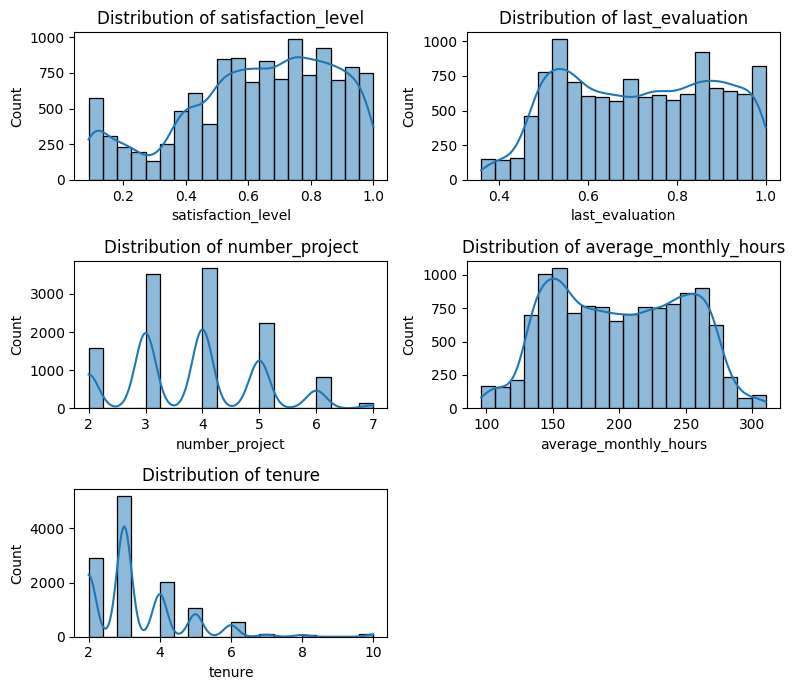

In [15]:
plt.figure(figsize=(8,7))

# looping through all numerical columns with index starting at 1
for i, col in enumerate(numerical_cols,1):
  plt.subplot(3,2,i)

  # histogram plot for numerical columns with KDE line
  sns.histplot(
      df1[col],  # columns for dataFrame to plot
      kde=True,  # Density estimation line True
      bins=20    # Data division in 20 equal ranges
      )
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

- **Employee Satisfaction:** The distribution is bimodal, indicating a clear split between a large group of very unsatisfied employees and another large group of very satisfied employees, with fewer people in the middle.

- **Performance Evaluation:** Most employees received an above-average evaluation (between 0.5 and 0.9), with a significant cluster of high performers (near 0.9).

- **Project Load:** The number of projects employees are working on is heavily clustered around 3, 4, and 5 projects.

- **Work Hours:** The average monthly hours distribution is also bimodal, showing two main groups: one working fewer hours and another working significantly more.

- **Job Tenure:** A large majority of employees have been with the company for 3 years, with a notable drop-off after 5 years, suggesting a potential retention issue after this period

#### ***3.2.2 Categorical Features***

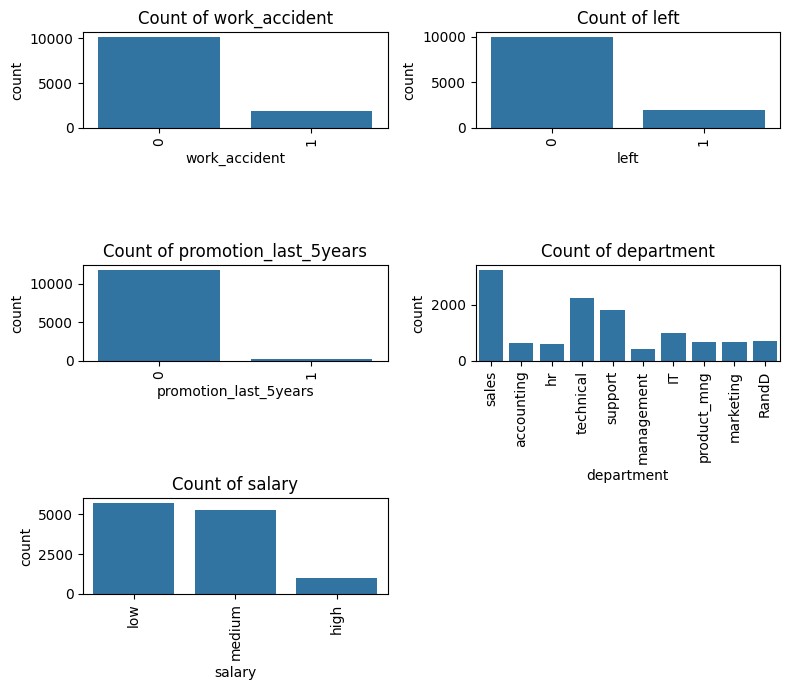

In [16]:
plt.figure(figsize=(8,7))

#looping through all categorical columns with index start at 1
for i, col in enumerate(categorical_cols,1):
  plt.subplot(3,2,i)

  # Count plot for categorical columns
  sns.countplot(
      x=col,   # Columns to plot on x-axis
      data=df1 # DataFrame containing data
      )
  plt.title(f'Count of {col}')
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show();

- **Distribution of satisfaction_level**: The data shows two peaks, indicating a divide between very satisfied and very unsatisfied employees.

- **Distribution of last_evaluation:** Most employees received an evaluation score between 0.5 and 0.9, suggesting generally good performance.

- **Distribution of number_project:** The majority of employees work on 3, 4, or 5 projects, with fewer working on 2, 6, or 7.

- **Distribution of average_monthly_hours:** There are two distinct groups of employees: those who work around 150 hours per month and those who work over 250 hours.

- **Distribution of tenure:** The largest number of employees have a tenure of 3 years, with a sharp drop in retention after the 5-year mark.

### **3.3 Bivariate Analysis (Double Variable)**

#### ***3.3.1 Numerical vs Target***

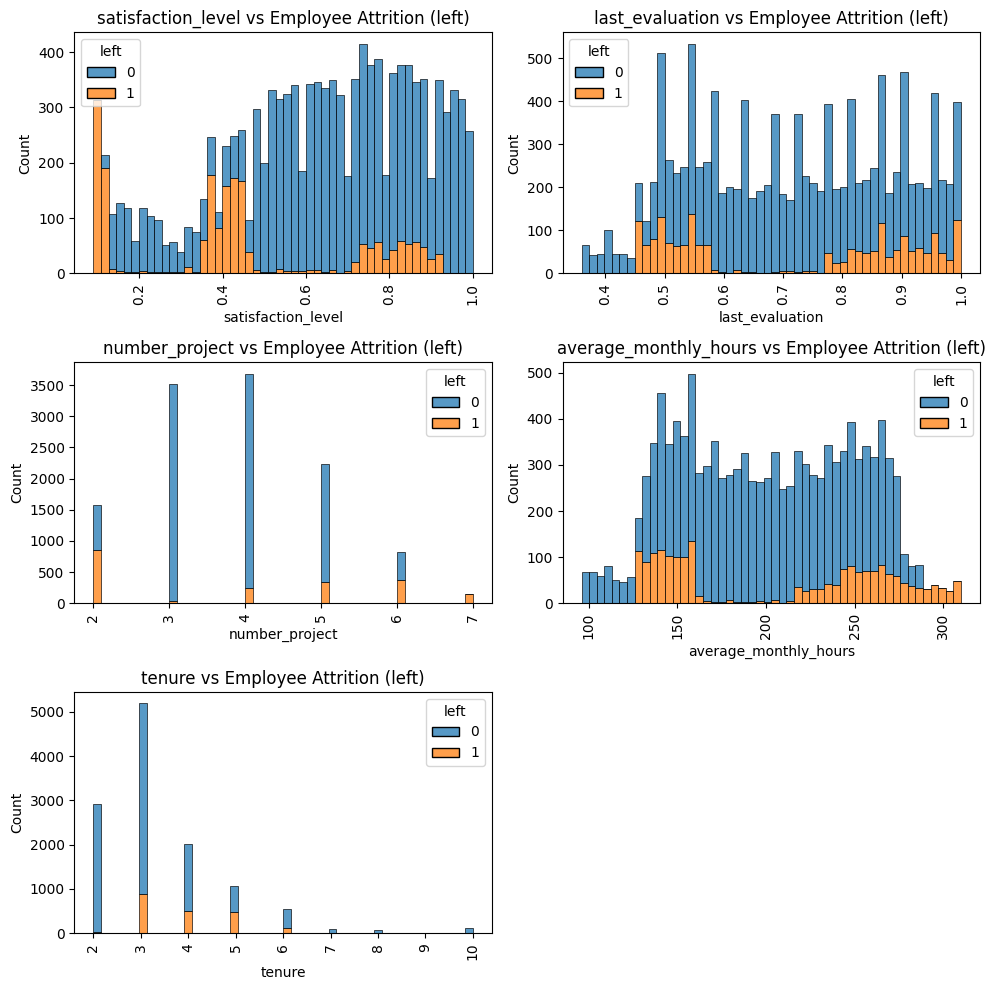

In [17]:
plt.figure(figsize=(10,10))

for i, col in enumerate(numeric_cols,1):
  plt.subplot(3,2,i)
  sns.histplot(
      x=col,      # columns to plot on x-axis
      data=df1,   # DataFrame containing the data
      bins=50,    # data in 50 equal ranges
      hue='left', # data split by target variable
      kde=False,  # Density estimation line: True or False
      multiple='stack' #  Stak bars on top of each other (left vs stayed)
      )
  plt.title(f'{col} vs Employee Attrition (left)')
  plt.xticks(rotation=90)

plt.tight_layout()
plt.show();

- **Satisfaction Level:** Employees with low satisfaction (below 0.4) are highly likely to leave, while those with high satisfaction (above 0.8) are unlikely to leave.

- *Last Evaluation:* Attrition is high for both very low- and very high-performing employees, but low for those with average evaluations.

- **Number of Projects:** Employees with very few (2) or very many (6 or 7) projects have the highest turnover rates.

- **Average Monthly Hours:** People working either too few or too many hours are more likely to leave the company.

- **Tenure:** The highest risk of attrition occurs at the 2-, 3-, and 5-year marks.

#### ***3.3.2 Categorical vs Target***

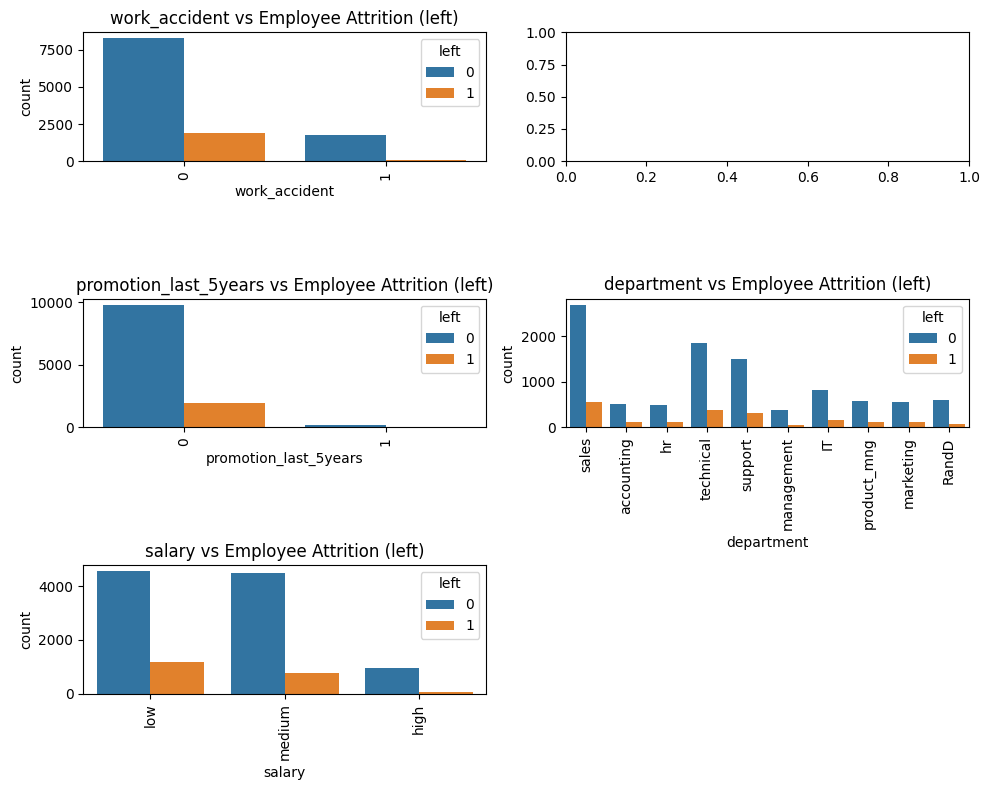

In [18]:
plt.figure(figsize=(10,8))

# looping through categorical columns with index starting at 1
for i, col in enumerate(categorical_cols,1):
  plt.subplot(3,2,i)
  if col != 'left':  # Skip the columns 'left' to avoid plot it against itself

    # count plot for categorical columns spliting on column 'left'
    sns.countplot(
        x=col,      # columns on x-axis
        hue='left', # seperating bar on column 'left'
        data=df1    # DataFrame containing data
        )

    plt.title(f'{col} vs Employee Attrition (left)')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show();

- Employees with work accidents did not show a high attrition rate, meaning accidents are not a key reason for leaving.

- Employees who received promotions in the last 5 years had very low attrition, while those without promotions were more likely to leave.

- Sales, Technical, and Support departments experienced the highest attrition compared to other departments.

- Employees with low salaries had the highest attrition, followed by medium salaries, while high-salary employees rarely left.

- Salary and promotions appear to be the strongest factors influencing employee retention.

- Certain departments with higher workload (like Sales and Support) are more prone to losing employees.

### **3.4 Numerical vs Numerical**

#### ***3.4.1 `average_monthly_hours` vs `number_project`***

Comparing employees who stayed versus those who left for following `average_monthly_hours` and `number_project`


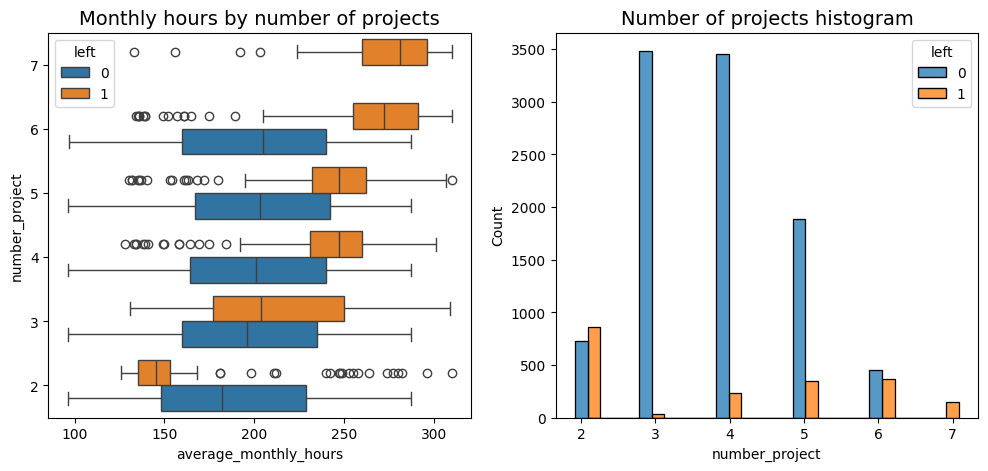

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))

# Creating boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(
    data=df1,                  # dataFrame containg data
    x='average_monthly_hours', # column on x-axis
    y='number_project',        # column on y-axis
    hue='left',                # spliting the data on column 'left'
    orient="h",                # boxplot on x-axis)
    ax=ax[0]                   # boxplot on the 1st axes of the subplot array
    )

# reversing the y-axis to flip the categories
ax[0].invert_yaxis()

ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Creating histogram showing distribution of `number_project`, comparing employees who stayed versus those who left

tenure_stay = df1[df1['left']==0]['number_project'] # Employees who stayed
tenure_left = df1[df1['left']==1]['number_project'] # Employees who left

# creating histogram comparing employees who left
sns.histplot(
    data=df1,           # dataFrame containing data
    x='number_project', # column on x-axis
    hue='left',         # spliting the data based on column 'left'
    multiple='dodge',   # placing bars side by side
    shrink=2,           # reducing bars width
    ax=ax[1]            # plot on the 2nd axes of the subplot array
    )
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

- **Workload and Attrition:** There's a clear relationship between the number of projects and hours worked. The average hours worked increases with the number of projects.

- **Two Groups of Leavers:** The employees who left can be divided into two groups:
  - **Group A (Low Hours):** Those who worked significantly fewer hours than their peers on the same number of projects. This could indicate they were either fired or had already given notice.

  - **Group B (High Hours):** Those who worked much longer hours. It's likely these employees left due to overwork or burnout.

- **Project Workload:** All employees working on 7 projects left the company. Their workload, along with those who left with 6 projects, was extremely high, averaging between 255 and 295 hours per month.

- **Optimal Project Number:** The best number of projects for an employee to work on appears to be 3 to 4, as these groups have the lowest ratio of employees who left versus those who stayed.

- Based on a standard 40-hour work week, most employees—even those who stayed—are working significantly more than the average of 167 hours per month, suggesting a widespread issue of overwork.

#### ***3.4.2 Scatter plot :  `average_monthly_hours` vs `satisfaction_level`***

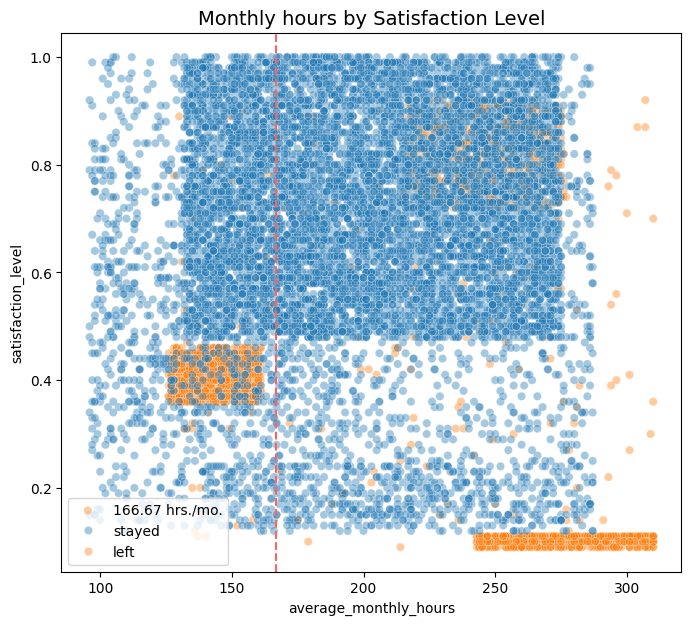

In [20]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left

plt.figure(figsize=(8,7))

sns.scatterplot(
    data=df1,                 # DataFrame containg data
    x='average_monthly_hours',# column on x-axis
    y='satisfaction_level',   # column on y-axis
    hue='left',               # spliting the data based on column 'left'
    alpha=0.4                 # transparency to 0.4 when points overlap
    )

# Drawing a vertical reference line at 166.67 hours/month
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')

# custom legend label
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])
plt.title('Monthly hours by Satisfaction Level', fontsize='14');

- **Low hours & low satisfaction:** Employees with few hours and low satisfaction often left.

- **High hours & low satisfaction:** Overworked employees with low satisfaction also left.

- **High achievers overworked:** Employees with very high hours (250+) and high evaluations (0.8+) frequently left, likely due to burnout.

- **Low satisfaction (<0.4):**  Strong predictor of leaving.

- **Stayed employees:** Mostly moderate hours, satisfaction 0.5–0.8, and decent evaluation scores.

**Conclusion:** Employees who were either underworked, overworked, or very dissatisfied were more likely to leave; overworking high performers appears to drive attrition.

#### ***3.4.3 Comparing `satisfaction_level` vs `tenure`***

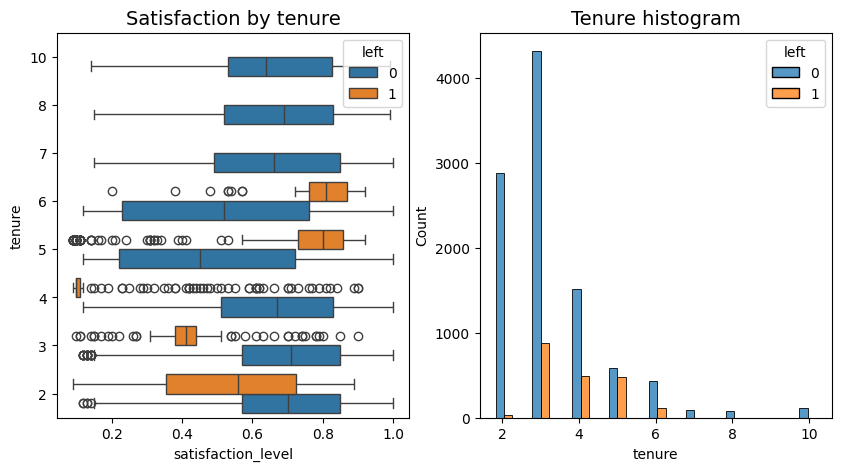

In [21]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (10,5))

# boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(
    data=df1,              # DataFrame containing data
    x='satisfaction_level',# column on x-axis
    y='tenure',            # column on y-axis
    hue='left',            # splitting data based on column 'left'
    orient="h",            # boxplot orientation horizontal
    ax=ax[0]               # boxplot on the 1st axes of the subplot array
    )

ax[0].invert_yaxis()  # invert y-axis to make higher tenure appears at the top
ax[0].set_title('Satisfaction by tenure', fontsize='14')



# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left

tenure_stay = df1[df1['left']==0]['tenure'] # filter if employee stayed
tenure_left = df1[df1['left']==1]['tenure'] # filter if employee left

# histogram for comparing tenure of employee who stayed and left.
sns.histplot(
    data=df1,        # DataFrame containing data
    x='tenure',      # column on x-axis
    hue='left',      # spliting data based on column 'left'
    multiple='dodge',# placing bars side by side for comparision
    shrink=5,      # reduce the bar width
    ax=ax[1]         # plot on the 2nd axes of the subplot array
    )
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

- **Satisfaction and Leaving:** Employees who left the company (left = 1) consistently had lower satisfaction levels than those who stayed (left = 0), particularly within the 2-5 year tenure range.

- **Retaining Long-Term Employees:** Employees with a tenure of 6 years or more have very low attrition rates, and their satisfaction levels are generally high. This suggests that once an employee stays past a certain point, they are more likely to remain with the company.

- The histogram shows a large number of employees left around the 3-4 year mark, while the box plot reveals that these same employees had very low satisfaction levels, reinforcing the strong link between low satisfaction and an employee's decision to leave.

Calculating the mean and median satisfaction scores of employees who left and those who didn't.

In [22]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df1.groupby(['left'])['satisfaction_level'].agg(['mean', 'median'])

mean  median
left                  
0     0.667365    0.69
1     0.440271    0.41

- Employees who left the company had lower average and median satisfaction scores than those who stayed.

- For employees who stayed, the average (mean) is a little lower than the middle value (median).

- This suggests that most people who stayed were fairly satisfied, but there were some with very low satisfaction scores that pulled the average down.

#### ***3.4.4 Comparing `salary` vs `tenure`***

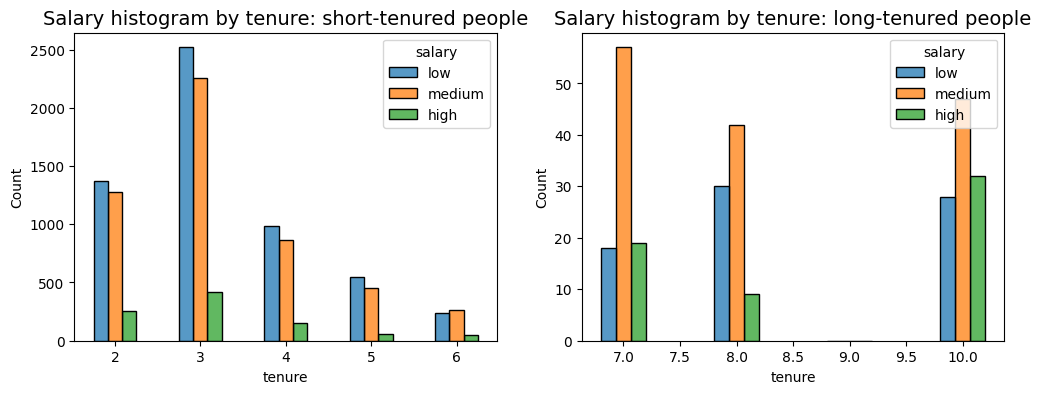

In [23]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (12,4))

# Defining short-tenured employees
tenure_short = df1[df1['tenure'] < 7]

# Defining long-tenured employees
tenure_long = df1[df1['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short,  # DataFrame contains data
             x='tenure',         # column on x-axis
             hue='salary',       # spliting data based on column 'salary'
             discrete=1,         # all values as discreate
             hue_order=['low', 'medium', 'high'], # hue values
             multiple='dodge',   # stacking bar side by side for comparision
             shrink=.5,          # shrink the size of bar
             ax=ax[0]            # plot on the first index of axes.
             )
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long,
             x='tenure',
             hue='salary',
             discrete=1,
             hue_order=['low', 'medium', 'high'],
             multiple='dodge',
             shrink=.4,
             ax=ax[1]
             )
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

- Salary and tenure are directly related. Employees who have been with the company for a longer period (7-10 years) are far more likely to have a medium or high salary.

- Shorter tenure correlates with lower pay. The majority of employees with less than six years of tenure fall into the low or medium salary brackets, with very few earning a high salary.

#### ***3.4.5 Scatterplot -  `average_monthly_hours` vs `last_evaluation`***

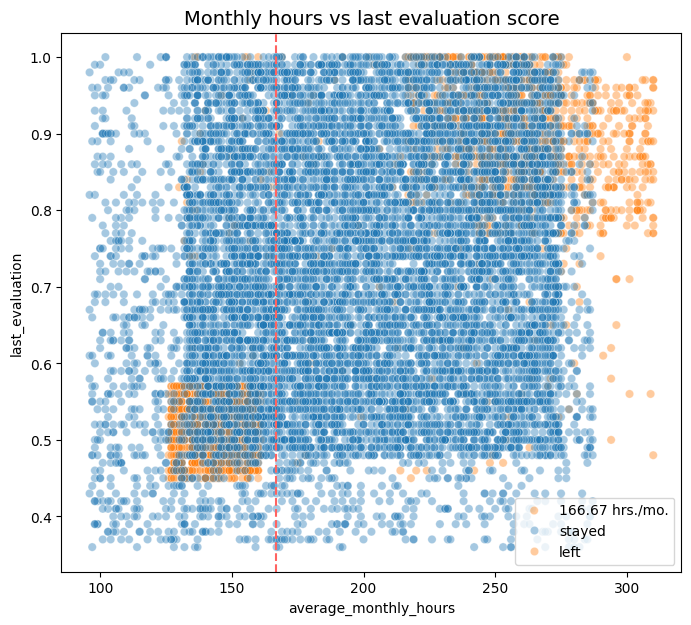

In [24]:
# scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(8, 7))

sns.scatterplot(
    data=df1,                   # DataFrame containing data
    x='average_monthly_hours',  # column on x-axis
    y='last_evaluation',        # column on y-axis
    hue='left',                 # splitting data base on column 'left'
    alpha=0.4                   # transparency to 0.4 when points overlap
    )

# Drawing a vertical reference line at 166.67 hours/month
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./mo.', ls='--')

# custom label
plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])

plt.title('Monthly hours vs last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores.
- There seems to be a correlation between hours worked and evaluation score.
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

#### ***3.4.6 Scatter plot - `average_monthly_hours`  vs `promotion_last_5years`***

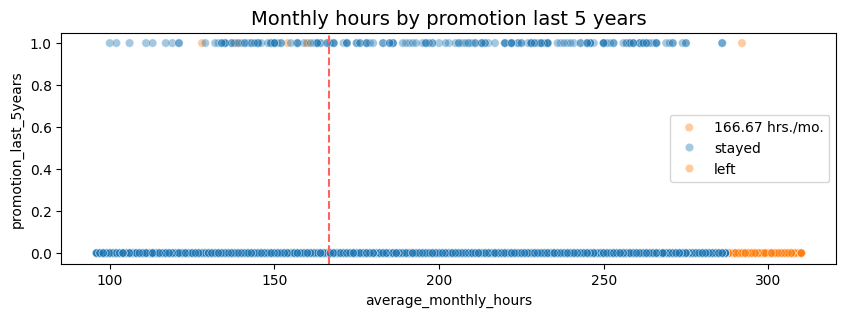

In [25]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`
plt.figure(figsize=(10, 3))

sns.scatterplot(
    data=df1,                 # Dataframe containing data
    x='average_monthly_hours',# column on x-axis
    y='promotion_last_5years',# column on y-axis
    hue='left',               # splitting data based on column 'left'
    alpha=0.4                 # transparency to 0.4 when points overlap
    )

# Drawing a vertical reference line at 166.67 hours/month
plt.axvline(x=166.67, color='#ff6361', ls='--')

plt.legend(labels=['166.67 hrs./mo.', 'stayed', 'left'])

plt.title('Monthly hours by promotion last 5 years', fontsize='14');

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours

#### ***3.4.7 Distribution of Employees across all departments***

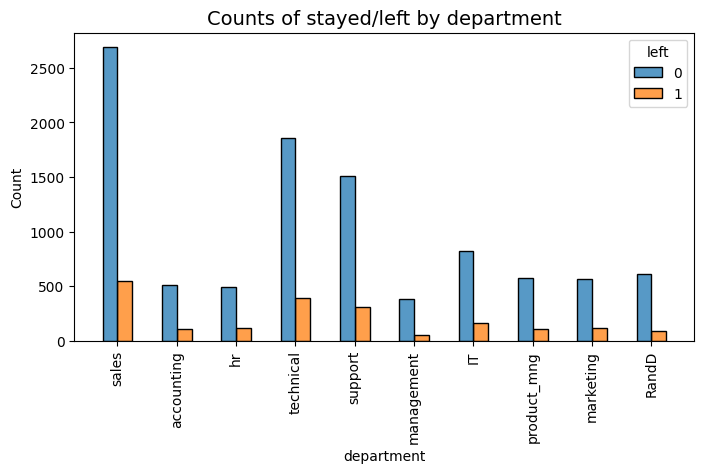

In [26]:
# stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(8,4))

sns.histplot(
    data=df1,        # Dataframe containing data
    x='department',  # column on x-axis
    hue='left',      # splitting data based on column 'left'
    discrete=1,      # keeping the count discrete
    hue_order=[0, 1],# order of the hue: 0 for stayed, 1 for left
    multiple='dodge',# bars side by side
    shrink=.5        # shrink bar width
    )

plt.xticks(rotation='vertical')
plt.title('Counts of stayed/left by department', fontsize=14);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed.

Lastly, you could check for strong correlations between variables in the data.

#### ***3.4.8 Heatmap for Correlation Analysis***

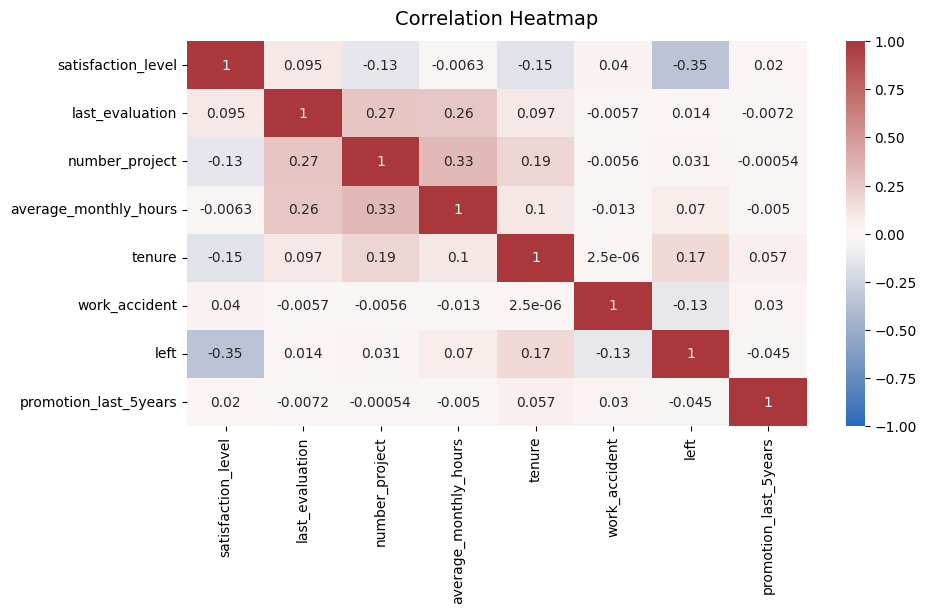

In [27]:
# Plot a correlation heatmap
plt.figure(figsize=(10, 5))

# Compute correlation matrix using only numeric columns
# (ignores categorical columns like 'department' and 'salary')
corr = df1.select_dtypes(include=['number']).corr() # only numeric columns

heatmap = sns.heatmap(
    corr,          # correlation matrix
    vmin=-1,vmax=1,# color range (=1 to 1)
    annot=True,    # correlation value inside cell

    #vlag   = colour diverging from blue-->white-->red
    #as_cmap= continous colour
    cmap=sns.color_palette("vlag", as_cmap=True)
    )

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12);

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### **Insights**

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave.

# **paCe: Construct Stage**
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data

### **Model assumptions**
**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size

**Project task:**
- Goal is to predict whether an employee leaves the company, which is a categorical outcome variable. So this task involves classification.

- This involves binary classification, since the outcome variable `left` can be either 1 (indicating employee left) or 0 (indicating employee didn't leave).

- Variable which need to be predicted (whether an employee leaves the company) is categorical following approched can be used for it:
  - Logistic Regression model
  - Tree-based Machine Learning model

## 4. **Modeling Approach A: Logistic Regression Model**

### **4.1 Categorical Variable Encoding**

In dataset these two variables `department` and `salary` are categorical which need to be converted to numeric using encoding technique.

- `department` is nomial category for it using one-hot encoding (dummy encoding)
- `salary` is ordinal and there's a hierarchy in this category for it using Label encoding (ordinal encoding).

In [28]:
# dataset copy
df_encode = df1.copy()

# Label encoding: salary
df_encode['salary'] = (
    df_encode['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# One-hot encoding: department
df_encode = pd.get_dummies(df_encode, drop_first=False)

# encoded dataframe
df_encode.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
1                0.80             0.86               5                    262   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
1       6              0     1                      0       1          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
1             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
1                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
1              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False

In [29]:
# column names after encoding
df_encode.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'salary', 'department_IT', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng', 'department_sales',
       'department_support', 'department_technical'],
      dtype='object')

### **4.2 Outlier Removal:**

Logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers in the `tenure` column that were identified earlier during EDA.

In [30]:
# Selecting rows without outliers in `tenure` and saving resulting dataframe in a new variable
df_logreg = df_encode[(df_encode['tenure'] >= lower_limit) & (df_encode['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

satisfaction_level  last_evaluation  number_project  average_monthly_hours  \
0                0.38             0.53               2                    157   
2                0.11             0.88               7                    272   
3                0.72             0.87               5                    223   
4                0.37             0.52               2                    159   
5                0.41             0.50               2                    153   

   tenure  work_accident  left  promotion_last_5years  salary  department_IT  \
0       3              0     1                      0       0          False   
2       4              0     1                      0       1          False   
3       5              0     1                      0       0          False   
4       3              0     1                      0       0          False   
5       3              0     1                      0       0          False   

   department_RandD  department_accounting  department_hr  \
0             False                  False          False   
2             False                  False          False   
3             False                  False          False   
4             False                  False          False   
5             False                  False          False   

   department_management  department_marketing  department_product_mng  \
0                  False                 False                   False   
2                  False                 False                   False   
3                  False                 False                   False   
4                  False                 False                   False   
5                  False                 False                   False   

   department_sales  department_support  department_technical  
0              True               False                 False  
2              True               False                 False  
3              True               False                 False  
4              True               False                 False  
5              True               False                 False

### **4.3 Spliting dataset and training model**

In [31]:
# target variable
y = df_logreg['left']

In [32]:
# features of dataset
X = df_logreg.drop('left', axis=1)

In [33]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [34]:
# Constructor of a logistic regression model
log_clf = LogisticRegression(random_state=42, max_iter=500)

# fitting with training data
log_clf.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [35]:
# logistic regression model's predictions on the test set
y_pred = log_clf.predict(X_test)

### **4.4 Logistic Regression Model -- Evaluation**

#### ***4.4.1 Confusion Matrix***

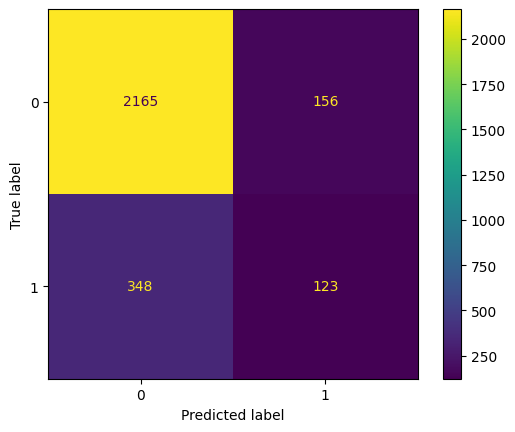

In [36]:
# values for confusion matrix
#
# y_test: actual labels from test set
# y_pred: predicted labels from logistic regressin classifier
# labels=log_clf.classes_ : to ensure matrix use same class order as classifier
log_cm = confusion_matrix(
    y_test,
    y_pred,
    labels=log_clf.classes_
    )

# display of confusion matrix
log_disp = ConfusionMatrixDisplay(
    confusion_matrix=log_cm,        # confusion matrix object
    display_labels=log_clf.classes_ # labels for the axes same as classifier
    )

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

- **upper-left** quadrant displays the number of *true negatives* (TN).
- **upper-right** quadrant displays the number of *false positives* (FP).
- **bottom-left** quadrant displays the number of *false negatives* (FN).
- **bottom-right** quadrant displays the number of *true positives* (TP).


---


>**True negatives:** The number of people who did not leave, the model accurately predicted did not leave.

>**False positives:** The number of people who did not leave, the model inaccurately predicted as leaving.

>**False negatives:** The number of people who left, the model inaccurately predicted did not leave

>**True positives:** The number of people who left, the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

#### ***4.4.2 Classificaiton Report***

Classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Before classifcation report checking the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [37]:
df_logreg['left'].value_counts(normalize=True)*100

left
0    83.146772
1    16.853228
Name: proportion, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced.

In [38]:
# Classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']

print(classification_report(y_test, y_pred, target_names=target_names))

#Steps to read classification report
# 1. Check Support level first
# 2. Check Recall of minority class (left)
# 3. Check F1 score of minority class
# 4. Compare precision vs recall
# (high precision, low recall-model is cautious, predicts only when it's sure)
# (Hight recall, low precision - model is careless and declare leaver to everyone.)

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



- The dataset is imbalanced: 83% stayed vs 17% left.
= The model performs well for the stayed class (Precision 0.86, Recall 0.93, F1 0.90).
- Performance is weak for the left class (Precision 0.44, Recall 0.26, F1 0.33).
- Overall accuracy is 82%, but this is misleading due to imbalance.
- Macro F1 is low (0.61), showing poor balance between classes.
- The model mainly identifies stayed employees correctly but misses many leavers, which is critical for attrition analysis.

## **5. Modeling Approach B: Tree-based Model**
This approach covers implementation of Decision Tree and Random Forest.

### **5.1 Spliting dataset and training model**

In [39]:
# target variable
y = df_encode['left']

In [40]:
# features of dataset
X = df_encode.drop('left', axis=1)

In [41]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### **5.2 Decision tree - Round 1**

In [42]:
# Instantiate model
dtree = DecisionTreeClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over
cv_params = {
    # maximum depth of tree, limits how deep the tree can grow
    'max_depth':[4, 6, 8, None],

    # minimum number of samples at a leaf node
    'min_samples_leaf': [2, 5, 1],

    # minimum number of samples to split an internal node
    'min_samples_split': [2, 4, 6]
    }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
dtree1 = GridSearchCV(
    dtree,          # DecisionTreeClassifier instance
    cv_params,      # Dictionary of hyperparameters
    scoring=scoring,# Metric(s) to evaluate model performance
    cv=4,           # Number of folds for cross-validation (4-fold CV)
    refit='roc_auc' # refit the model using the best ROC-AUC score
    )

In [43]:
# fitting with training data
%%time
dtree1.fit(X_train, y_train)

CPU times: user 4.06 s, sys: 2.75 ms, total: 4.06 s
Wall time: 4.07 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [44]:
# Check best parameters
dtree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [45]:
# Check best AUC score on CV
dtree1.best_score_

np.float64(0.969819392792457)

This is a strong AUC score, which shows that this model can predict employees who will leave very well.

#### ***5.2.1 Best Model Evaluation***

In [46]:
def make_results(model_name:str, model_object, metric:str):
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc

    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.
    '''

    # Create dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extract Accuracy, precision, recall, and f1 score from that row for best #model
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy

    # Create table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })

    return table

Use the function just defined to get all the scores from grid search.

In [47]:
# Get all CV scores
dtree1_cv_results = make_results('decision tree cv', dtree1, 'auc')
dtree1_cv_results

model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819

All of these scores from the decision tree model are strong indicators of good model performance.

Recall that decision trees can be vulnerable to overfitting, and random forests avoid overfitting by incorporating multiple trees to make predictions. You could construct a random forest model next.

### **5.3 Random forest - Round 1**

In [48]:
# Instantiate the Random Forest model with a fixed random state for reproducibility
rf = RandomForestClassifier(random_state=0)

# Assigning a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],   # maximum depth of trees
             'max_features': [1.0],      # For best split (1.0 means all feat.)
             'max_samples': [0.7, 1.0],  # samples to draw from X to train tree
             'min_samples_leaf': [1,2,3],# minimum samples at leaf node
             'min_samples_split': [2,3,4],# samples to split internal node
             'n_estimators': [300, 500],  # number of trees in random forest
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf1 = GridSearchCV(rf,             # random forest classifier object
                   cv_params,      # dictonary of hyper parameter
                   scoring=scoring,# metrics for model evaluation
                   cv=4,           # number of cross validation folds
                   refit='roc_auc' # metrics to choose best model for CV
                   )

In [49]:
%%time
rf1.fit(X_train, y_train) # --> Wall time: ~10min

CPU times: user 23min 28s, sys: 1.73 s, total: 23min 30s
Wall time: 23min 36s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

#### ***5.3.1 Saving model using pickel***

In [64]:
import os
import pickle

def write_pickle(model_object, save_as:str):
    """
    Saving a model as a pickle file in the same folder as the current notebook
    (works with Colab → GitHub workflow).

    In:
        model_object: a model wanted to pickle
        save_as:      filename for how to save the model (without extension)

    Out:
        Pickle file saved in the current notebook folder (ready for GitHub commit)
    """
    # current folder of the notebook
    path = os.getcwd() + '/'

    # saving the model
    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

    print(f"Model saved as {save_as}.pickle in {path}")

In [65]:
def read_pickle(saved_model_name: str):
    """
    Load a pickled model from the same folder as the current notebook
    (works with Colab → GitHub workflow).

    In:
        saved_model_name: filename of pickled model you want to read (without extension)

    Out:
        model: the unpickled model object
    """
    # Current folder of the notebook
    path = os.getcwd() + '/'

    # Load the model
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    print(f"Model {saved_model_name}.pickle loaded from {path}")
    return model

Use the functions defined above to save the model in a pickle file and then read it in.

In [66]:
# Write pickle
write_pickle(rf1, 'hr_rf1')

Model saved as hr_rf1.pickle in /content/


In [67]:
# Read pickle
rf1 = read_pickle('hr_rf1')

Model hr_rf1.pickle loaded from /content/


#### ***5.3.2 AUC Score & Best parameters***

In [68]:
# Checking best AUC score on CV
rf1.best_score_

np.float64(0.9804250949807172)

In [69]:
# Checking best params
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [70]:
# All CV scores
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(dtree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


The evaluation scores of the random forest model are better than those of the decision tree model, with the exception of recall (the recall score of the random forest model is approximately 0.001 lower, which is a negligible amount). This indicates that the random forest model mostly outperforms the decision tree model.

Next, you can evaluate the final model on the test set.

#### ***5.3.3 Function to Get all Scores from model***

In [71]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Function to generate a table of test scores for a trained model.

    In:
        model_name (string):  Name of the model to display
        model:                A trained GridSearchCV object (already fitted)
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''
    # choosing the best estimator choosen by GridSearchCV to generate
    # prediction on unseen test data.
    # output will be array of 0 & 1 stored in pred.
    preds = model.best_estimator_.predict(X_test_data)

    # Calculating AUC score based on predicted values & test data
    # tells how well model distinguish between the leaver and stayed.
    auc = roc_auc_score(y_test_data, preds)

    # Accuracy = total correct prediction / total predicitons
    accuracy = accuracy_score(y_test_data, preds)

    # Precision is how many were actually positive
    # Precision = True Positive / (True Positive + False Positive)
    precision = precision_score(y_test_data, preds)

    # How many correctly predicted as positive
    # Recall = True Positive / (True Positive + False Negative)
    recall = recall_score(y_test_data, preds)

    # balance of both precision and recall in one metrics
    # F1 = 2*(Precision + Recall) / (Precision + Recall)
    f1 = f1_score(y_test_data, preds)

    # creating a pandas DataFrame of all metrics
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })

    return table

In [72]:
# Getting predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

model  precision    recall        f1  accuracy       AUC
0  random forest1 test   0.964211  0.919679  0.941418  0.980987  0.956439

The test scores are very similar to the validation scores, which is good. This appears to be a strong model. Since this test set was only used for this model, you can be more confident that your model's performance on this data is representative of how it will perform on new, unseeen data.

## **6. Feature Analysis for Data Leakage**

> High evaluation scores may be due to data leakage, where the model sees information it shouldn’t have during training.
Columns like `satisfaction_level` or `average_monthly_hours` could leak target information.

> To prevent this, drop `satisfaction_level` and create a new binary feature overworked to indicate if an employee is working excessively.

### **6.1 Droppiong Columns `satisfaction_level` & `average_monthly_hours`**

In [80]:
# Drop `satisfaction_level` and saving resulting dataframe in new variable
df2 = df_encode.drop(['satisfaction_level', 'average_monthly_hours'], axis=1)

# Display first few rows of new dataframe
df2.head()

last_evaluation  number_project  tenure  work_accident  left  \
0             0.53               2       3              0     1   
1             0.86               5       6              0     1   
2             0.88               7       4              0     1   
3             0.87               5       5              0     1   
4             0.52               2       3              0     1   

   promotion_last_5years  salary  department_IT  department_RandD  \
0                      0       0          False             False   
1                      0       1          False             False   
2                      0       1          False             False   
3                      0       0          False             False   
4                      0       0          False             False   

   department_accounting  department_hr  department_management  \
0                  False          False                  False   
1                  False          False                  False   
2                  False          False                  False   
3                  False          False                  False   
4                  False          False                  False   

   department_marketing  department_product_mng  department_sales  \
0                 False                   False              True   
1                 False                   False              True   
2                 False                   False              True   
3                 False                   False              True   
4                 False                   False              True   

   department_support  department_technical  
0               False                 False  
1               False                 False  
2               False                 False  
3               False                 False  
4               False                 False

### **6.2 Adding New Column `overworked`**

In [74]:
# Create `overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspect max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


- 166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.

- This can help define overworked as working more than 175 hours per month on average.

- To make the `overworked` column binary, reassigning using boolean mask.

In [78]:
# Define `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

# Display first few rows of new column
df2.sample(5)

last_evaluation  number_project  average_monthly_hours  tenure  \
2661             0.72               3                    272       3   
7767             0.65               4                    134       3   
748              0.50               2                    127       3   
4891             0.78               3                    204       2   
7764             0.85               5                     99       2   

      work_accident  left  promotion_last_5years  salary  department_IT  \
2661              0     0                      0       0          False   
7767              0     0                      0       1          False   
748               0     1                      0       0           True   
4891              1     0                      0       1          False   
7764              1     0                      0       2          False   

      department_RandD  department_accounting  department_hr  \
2661             False                  False          False   
7767             False                  False          False   
748              False                  False          False   
4891             False                  False          False   
7764             False                  False          False   

      department_management  department_marketing  department_product_mng  \
2661                  False                 False                    True   
7767                  False                 False                   False   
748                   False                 False                   False   
4891                  False                  True                   False   
7764                  False                 False                   False   

      department_sales  department_support  department_technical  overworked  
2661             False               False                 False           0  
7767             False               False                  True           0  
748              False               False                 False           0  
4891             False               False                 False           0  
7764             False                True                 False           0

### **6.3 Spliting dataset and training model**

In [82]:
# target variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

In [83]:
# spliting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

## **7. Reimplementing Tree based Model**

After dropping the columns `satisfaction_level` & `average_monthly_hours` to prevent the data leakage and then again traing the tree based models of decision tree and random forest model to check the score of the model.

### **7.1 Decision tree - Round 2**

In [86]:
# Instantiate model
tree = DecisionTreeClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [87]:
%%time
tree2.fit(X_train, y_train)

CPU times: user 3.09 s, sys: 1.01 ms, total: 3.09 s
Wall time: 3.1 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

#### ***7.1.1 AUC Score & Best parameters***

In [88]:
# Check best params
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [89]:
# Check best AUC score on CV
tree2.best_score_

np.float64(0.9557695904001376)

This model performs very well, even without satisfaction levels and detailed hours worked data.

In [90]:
# Get all CV scores
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(dtree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy      auc
0  decision tree2 cv   0.844105  0.902881  0.872316  0.956077  0.95577


Some of the other scores fell. That's to be expected given fewer features were taken into account in this round of the model. Still, the scores are very good.

### **7.2 Random forest - Round 2**

In [93]:
# Instantiate model
rf = RandomForestClassifier(random_state=0)

# Assign a dictionary of hyperparameters to search over
cv_params = {'max_depth': [3,5, None],
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }

# Assign a dictionary of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']

# Instantiate GridSearch
rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [94]:
%%time
rf2.fit(X_train, y_train) # --> Wall time: 7min 5s

CPU times: user 16min 6s, sys: 1.5 s, total: 16min 8s
Wall time: 16min 17s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

#### ***7.2.1 Write & Read Pickle***

In [95]:
# Write pickle
write_pickle(rf2, 'hr_rf2')

Model saved as hr_rf2.pickle in /content/


In [96]:
# Read in pickle
rf2 = read_pickle('hr_rf2')

Model hr_rf2.pickle loaded from /content/


#### ***7.2.2 AUC Score & Best parameters***

In [97]:
# Check best params
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 300}

In [98]:
# Check best AUC score on CV
rf2.best_score_

np.float64(0.9626187935178947)

In [99]:
# Get all CV scores
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy      auc
0  decision tree2 cv   0.844105  0.902881  0.872316  0.956077  0.95577
               model  precision   recall        F1  accuracy       auc
0  random forest2 cv    0.84984  0.86133  0.855059  0.951517  0.962619


Again, the scores dropped slightly, but the random forest performs better than the decision tree if using AUC as the deciding metric.

In [100]:
# Get predictions on test data
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

model  precision    recall       f1  accuracy       AUC
0  random forest2 test   0.826958  0.911647  0.86724  0.953636  0.936823

This seems to be a stable, well-performing final model.

#### ***7.2.3 Confusion Matrix***

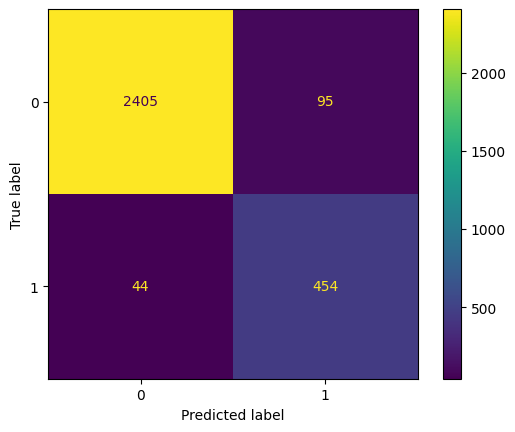

In [101]:
# Generate array of values for confusion matrix
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

The model predicts more false positives than false negatives, which means that some employees may be identified as at risk of quitting or getting fired, when that's actually not the case. But this is still a strong model.

## **8. Decision Tree Splits**

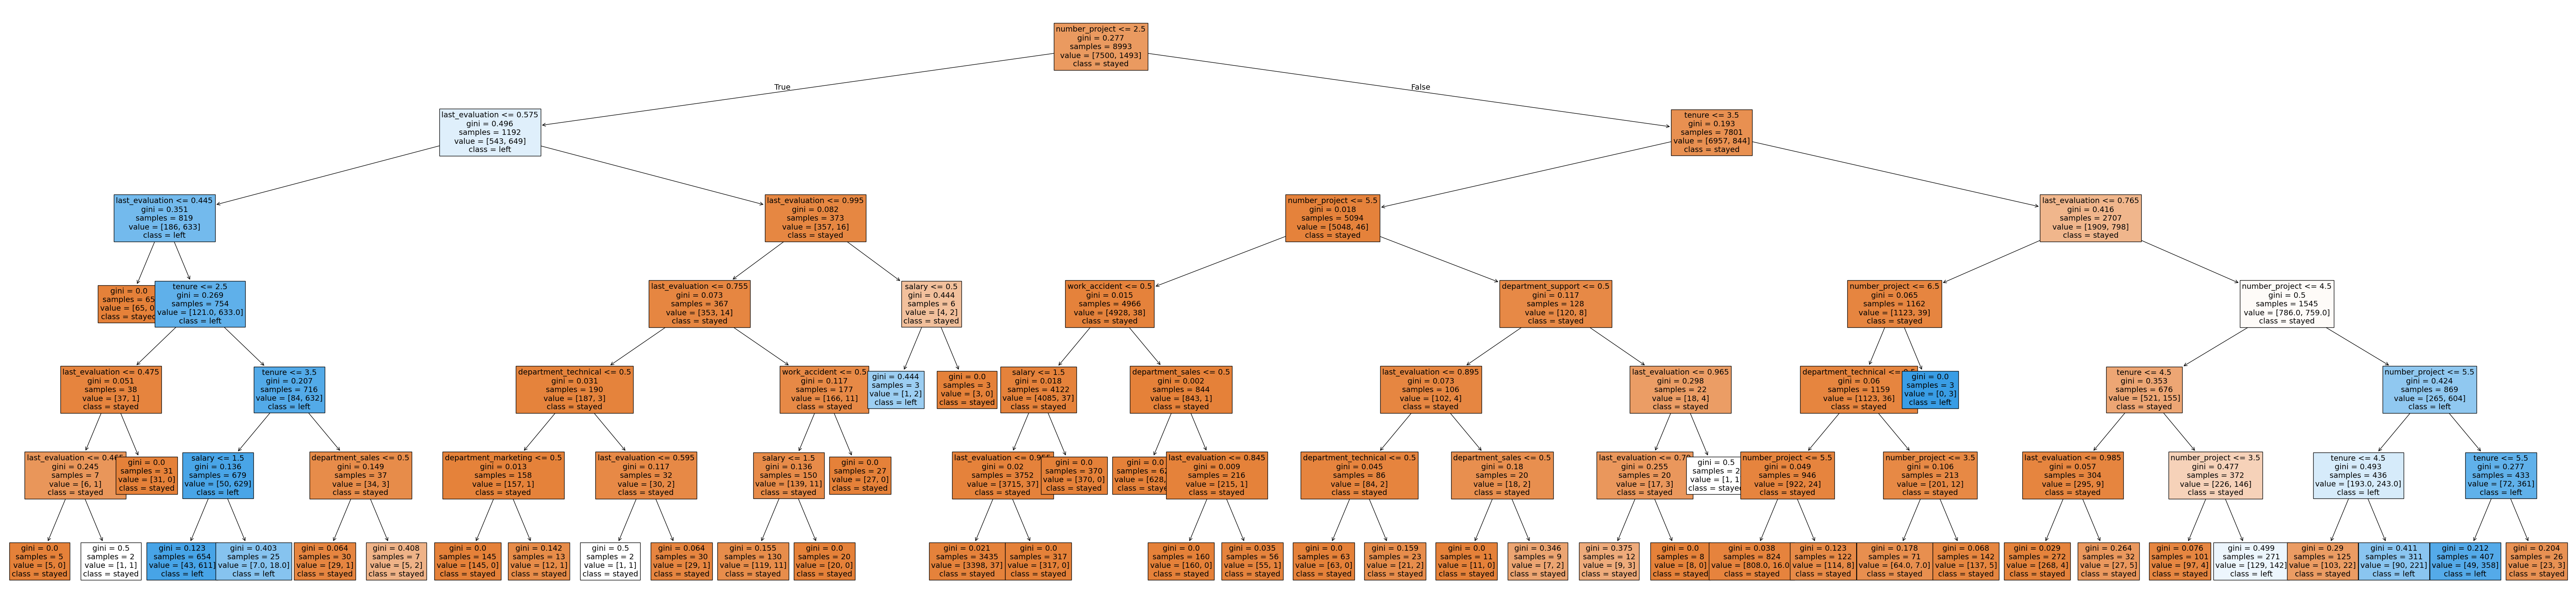

In [103]:
plt.figure(figsize=(85,20))

plot_tree(
    # Trained decision tree model from GridSearchCV (best estimator)
    tree2.best_estimator_,

    # Only show the first 6 levels of the tree to keep the plot readable
    max_depth=6,

    # Each node font size
    fontsize=14,

    # Names of the features at each split instead of generic indices
    feature_names=X.columns,

    # Label for the classes
    class_names={0:'stayed', 1:'left'},

    # Fill the nodes with colors according to the majority class
    filled=True
);

plt.show()


## **9. Feature Importance**

### **9.1 Decision tree feature importance**


In [104]:
# Dataframe to store the train decision tree features importance
tree2_importances = pd.DataFrame(
    # array of feature importance best model from GridSearchCV
    tree2.best_estimator_.feature_importances_,

    # column name
    columns=['gini_importance'],

    # features names as row indices
    index=X.columns
    )

# sorting feature importance (most important)
tree2_importances = tree2_importances.sort_values(
    by='gini_importance',
    ascending=False
    )

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

gini_importance
last_evaluation              0.356738
number_project               0.352547
tenure                       0.286785
salary                       0.002147
department_sales             0.000678
department_support           0.000421
department_technical         0.000421
work_accident                0.000184
department_marketing         0.000079

### **9.1.1 Decision Tree - feature importance Plot**

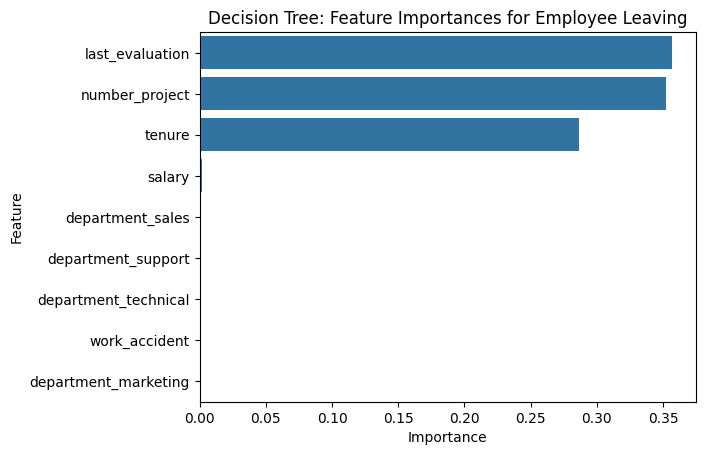

In [105]:
sns.barplot(
    data=tree2_importances,
    x="gini_importance",
    y=tree2_importances.index,
    orient='h'
    )

plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()


The barplot above shows that in this decision tree model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`.

### **9.2 Random forest feature importance**####

In [109]:
rf2_importance = pd.DataFrame(
    rf2.best_estimator_.feature_importances_,
    columns=['gini_importance'],
    index=X.columns
)

rf2_importance = rf2_importance.sort_values(
    by='gini_importance',
    ascending=False
)

rf2_importance = rf2_importance[rf2_importance['gini_importance'] !=0]

rf2_importance

gini_importance
number_project                 0.376536
last_evaluation                0.375648
tenure                         0.244424
salary                         0.000643
department_technical           0.000543
department_support             0.000518
department_IT                  0.000453
work_accident                  0.000412
department_sales               0.000246
department_product_mng         0.000199
department_RandD               0.000119
department_accounting          0.000091
department_marketing           0.000081
department_hr                  0.000059
department_management          0.000015
promotion_last_5years          0.000012

### **9.2.1 Random forest - feature importance Plot**

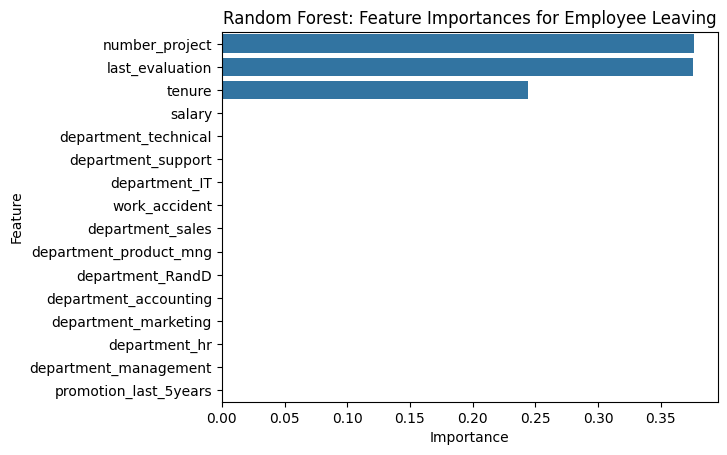

In [110]:
sns.barplot(
    data=rf2_importance,
    x="gini_importance",
    y=rf2_importance.index,
    orient='h'
    )

plt.title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

The plot above shows that in this random forest model, `last_evaluation`, `number_project`, `tenure`, and `overworked` have the highest importance, in that order. These variables are most helpful in predicting the outcome variable, `left`, and they are the same as the ones used by the decision tree model.

# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



💭
### Reflect on these questions as you complete the executing stage.

- What key insights emerged from your model(s)?
- What business recommendations do you propose based on the models built?
- What potential recommendations would you make to your manager/company?
- Do you think your model could be improved? Why or why not? How?
- Given what you know about the data and the models you were using, what other questions could you address for the team?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?



## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results

**Logistic Regression**

The logistic regression model achieved precision of 80%, recall of 83%, f1-score of 80% (all weighted averages), and accuracy of 83%, on the test set.

**Tree-based Machine Learning**

After conducting feature engineering, the decision tree model achieved AUC of 93.8%, precision of 87.0%, recall of 90.4%, f1-score of 88.7%, and accuracy of 96.2%, on the test set. The random forest modestly outperformed the decision tree model.

### Conclusion, Recommendations, Next Steps

The models and the feature importances extracted from the models confirm that employees at the company are overworked.

To retain employees, the following recommendations could be presented to the stakeholders:

* Cap the number of projects that employees can work on.
* Consider promoting employees who have been with the company for atleast four years, or conduct further investigation about why four-year tenured employees are so dissatisfied.
* Either reward employees for working longer hours, or don't require them to do so.
* If employees aren't familiar with the company's overtime pay policies, inform them about this. If the expectations around workload and time off aren't explicit, make them clear.
* Hold company-wide and within-team discussions to understand and address the company work culture, across the board and in specific contexts.
* High evaluation scores should not be reserved for employees who work 200+ hours per month. Consider a proportionate scale for rewarding employees who contribute more/put in more effort.

**Next Steps**

It may be justified to still have some concern about data leakage. It could be prudent to consider how predictions change when `last_evaluation` is removed from the data. It's possible that evaluations aren't performed very frequently, in which case it would be useful to be able to predict employee retention without this feature. It's also possible that the evaluation score determines whether an employee leaves or stays, in which case it could be useful to pivot and try to predict performance score. The same could be said for satisfaction score.